# Exploratory Data Analysis: Yellow Taxi NYC April 2022

###### Roissyah Fernanda - https://www.linkedin.com/in/roissyahfernanda/

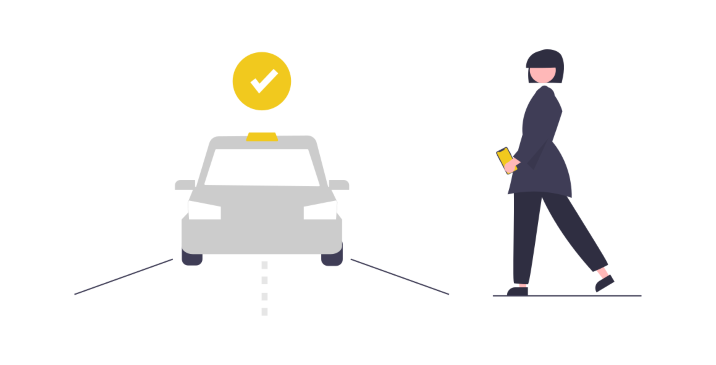

## About The Mini Project

The aim of creating this mini project is to perform easy way to do Exploratory Data Analysis using Python.

I fully undestood the imperfection of my work, please advise on any kind of code / question / statement that bothering you.

## Data Set Used

The data set obtained from Pacmann AI Mini Course entitled "Intro to Data and Analytics".
Unfortunately, the data set show only Yellow Taxi Trip records in April 2022 and it contains only 1000 records which taken as sample.

Data set link:
https://drive.google.com/file/d/11nW6lv9u4DmqndhtDRkJnIoxrFncT3E6/view?usp=sharing
    
And here's link to access data dictionary: https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

# 1. Preparation

In [1]:
#import required packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

import math

In [2]:
#note that i have cleaned the raw data set in separated notebook
ready_df = pd.read_csv('CLEAN_yellow_tlc_apr2022.csv', sep = ',')
ready_df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,2,2022-04-01 0:04:55,2022-04-01 0:14:38,1.0,2.02,1.0,N,114,170,3,9.0,0.50,0.5,0.00,0.0,0.3,12.80,2.5,0.00
1,1,1,2022-04-01 6:02:11,2022-04-01 6:21:36,1.0,5.70,1.0,N,132,216,3,19.0,1.25,0.5,0.00,0.0,0.3,21.05,0.0,1.25
2,2,2,2022-04-01 8:45:59,2022-04-01 9:04:37,1.0,3.16,1.0,N,211,162,2,14.5,0.00,0.5,3.56,0.0,0.3,21.36,2.5,0.00
3,3,2,2022-04-01 9:25:53,2022-04-01 9:30:41,1.0,0.69,1.0,N,237,236,2,5.5,0.00,0.5,0.80,0.0,0.3,9.60,2.5,0.00
4,4,2,2022-04-01 12:30:37,2022-04-01 12:42:09,1.0,2.20,1.0,N,238,237,2,10.0,0.00,0.5,3.33,0.0,0.3,16.63,2.5,0.00


In [3]:
#exclude unused columns
ready_df.drop(['Unnamed: 0', 'PULocationID', 'DOLocationID'], axis=1, inplace=True)
ready_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2022-04-01 0:04:55,2022-04-01 0:14:38,1.0,2.02,1.0,N,3,9.0,0.50,0.5,0.00,0.0,0.3,12.80,2.5,0.00
1,1,2022-04-01 6:02:11,2022-04-01 6:21:36,1.0,5.70,1.0,N,3,19.0,1.25,0.5,0.00,0.0,0.3,21.05,0.0,1.25
2,2,2022-04-01 8:45:59,2022-04-01 9:04:37,1.0,3.16,1.0,N,2,14.5,0.00,0.5,3.56,0.0,0.3,21.36,2.5,0.00
3,2,2022-04-01 9:25:53,2022-04-01 9:30:41,1.0,0.69,1.0,N,2,5.5,0.00,0.5,0.80,0.0,0.3,9.60,2.5,0.00
4,2,2022-04-01 12:30:37,2022-04-01 12:42:09,1.0,2.20,1.0,N,2,10.0,0.00,0.5,3.33,0.0,0.3,16.63,2.5,0.00


In [4]:
ready_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               1000 non-null   int64  
 1   tpep_pickup_datetime   1000 non-null   object 
 2   tpep_dropoff_datetime  1000 non-null   object 
 3   passenger_count        1000 non-null   float64
 4   trip_distance          1000 non-null   float64
 5   RatecodeID             1000 non-null   float64
 6   store_and_fwd_flag     1000 non-null   object 
 7   payment_type           1000 non-null   int64  
 8   fare_amount            1000 non-null   float64
 9   extra                  1000 non-null   float64
 10  mta_tax                1000 non-null   float64
 11  tip_amount             1000 non-null   float64
 12  tolls_amount           1000 non-null   float64
 13  improvement_surcharge  1000 non-null   float64
 14  total_amount           1000 non-null   float64
 15  conge

In [5]:
#check for missing value
ready_df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

# 2. Data Wrangling

## 2.1 Calculate trip duration and speed

In [4]:
import time
import datetime

In [5]:
#what to do: change dtype from object to datetime in "YYYY-MM-DD HH:MM:SS" format, and then into unix timestamp
#unix timestamp use to track time as a running total of seconds
#source: https://www.kaggle.com/code/mitishaagarwal/ny-yellow-taxi-trip-1

#this function will convert datetime columns to unix
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

#calculate trip duration by substracting tpep_dropoff_datetime with tpep_pickup_datetime 
def return_with_trip_times(ready_df):
    duration = ready_df[['tpep_pickup_datetime','tpep_dropoff_datetime']]
    #pickups and dropoffs to unix time
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    #calculate duration of trips
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)
    #append durations of trips and speed in miles/hr to a new dataframe
    new_df = ready_df[['tpep_pickup_datetime', 'total_amount', 'trip_distance', 'passenger_count', 'fare_amount', 'tip_amount', 'tolls_amount', 'airport_fee', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']]
    new_df['trip_duration'] = durations
    new_df['speed'] = 60*(new_df['trip_distance']/new_df['trip_duration']) #v = s/t
    return new_df
    
upd_df = return_with_trip_times(ready_df)

C:\Users\Roisyah\AppData\Local\Temp\ipykernel_7008\4165089292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['trip_duration'] = durations
C:\Users\Roisyah\AppData\Local\Temp\ipykernel_7008\4165089292.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['speed'] = 60*(new_df['trip_distance']/new_df['trip_duration']) #v = s/t


In [8]:
upd_df.tail()

,tpep_pickup_datetime,total_amount,trip_distance,passenger_count,fare_amount,tip_amount,tolls_amount,airport_fee,extra,mta_tax,improvement_surcharge,congestion_surcharge,trip_duration,speed
995,2022-04-28 18:28:00,40.72,5.55,1.0,30.03,7.39,0.0,0.0,0.0,0.5,0.3,2.0,43.000000,7.744186
996,2022-04-29 9:39:00,35.62,4.82,1.0,25.84,6.48,0.0,0.0,0.0,0.5,0.3,2.0,27.000000,10.711111
997,2022-04-29 15:09:54,9.36,0.40,1.0,4.50,1.56,0.0,0.0,0.0,0.5,0.3,2.0,3.700000,6.486486
998,2022-04-30 6:12:00,25.45,4.47,1.0,17.51,4.64,0.0,0.0,0.0,0.5,0.3,2.0,15.000000,17.880000
999,2022-04-30 12:20:37,11.00,0.90,1.0,5.50,2.20,0.0,0.0,0.0,0.5,0.3,2.0,5.066667,10.657895


## 2.2 Final aggregation

In [6]:
#convert object to dtype
upd_df['tpep_pickup_datetime'] = upd_df['tpep_pickup_datetime'].apply(pd.to_datetime)
upd_df['tpep_pickup_datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: tpep_pickup_datetime
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


C:\Users\Roisyah\AppData\Local\Temp\ipykernel_7008\1541318223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upd_df['tpep_pickup_datetime'] = upd_df['tpep_pickup_datetime'].apply(pd.to_datetime)


### 2.2.1 Daily aggregation

In [19]:
daily_agg_upd = upd_df.resample('D', on='tpep_pickup_datetime').agg({'tpep_pickup_datetime':'count',
                                               'total_amount': 'sum',
                                                'trip_distance': 'mean',
                                                'passenger_count': 'sum',
                                                'trip_duration': 'mean',
                                                'speed': 'mean',
                                                'fare_amount': 'mean',
                                                'tip_amount': 'sum',
                                                'tolls_amount': 'sum',
                                                'airport_fee': 'sum',
                                                'extra': 'sum',
                                                'mta_tax': 'sum',
                                                'improvement_surcharge': 'sum',
                                                'congestion_surcharge': 'mean'
                                                         })

daily_agg_upd.rename(columns={'tpep_pickup_datetime' : 'DailyTripCount',
                    'total_amount' : 'TotalDailyRevenue',
                    'trip_distance' : 'AverageDailyDistance',
                    'passenger_count': 'TotalDailyPassenger',
                    'trip_duration': 'AverageDailyDuration',
                    'speed': 'AverageDailySpeed',
                    'fare_amount': 'AverageDailyFare',
                    'tip_amount':'DailyTipAmount',
                    'tolls_amount': 'DailyTollsAmount',
                    'airport_fee': 'TotalDailyAirportFee',
                    'extra': 'TotalDailyExtra',
                    'mta_tax': 'TotalDailyMTATax',
                    'improvement_surcharge': 'TotalDailyImprovementSurcharge',
                    'congestion_surcharge': 'AverageDailyCongestionSurcharge'
                   }, inplace=True)
daily_agg_upd.head()

,DailyTripCount,TotalDailyRevenue,AverageDailyDistance,TotalDailyPassenger,AverageDailyDuration,AverageDailySpeed,AverageDailyFare,DailyTipAmount,DailyTollsAmount,TotalDailyAirportFee,TotalDailyExtra,TotalDailyMTATax,TotalDailyImprovementSurcharge,AverageDailyCongestionSurcharge
tpep_pickup_datetime,,,,,,,,,,,,,,
2022-04-01,29,605.93,3.564138,37.0,15.106897,11.938117,14.034483,67.08,19.65,5.00,47.75,14.5,8.7,2.327586
2022-04-02,30,720.69,3.822000,48.0,40.949444,13.261376,17.496667,87.04,16.10,1.25,13.00,13.0,8.4,2.066667
2022-04-03,28,559.01,4.658929,36.0,16.866667,14.423538,13.571429,70.81,19.65,1.25,17.75,13.0,7.8,2.214286
2022-04-04,43,918.34,2.856047,63.0,13.084496,12.302708,13.918605,125.29,38.40,1.25,48.50,21.0,12.9,2.383721
2022-04-05,34,511.03,1.877353,52.0,10.249510,10.669063,9.102941,73.83,0.00,0.00,38.00,17.0,10.2,2.485294


In [20]:
daily_agg_upd.shape

(30, 14)

In [26]:
daily_agg_upd.to_csv('final_upd_daily_aggregation.csv')

### 2.2.2 Weekly aggregation

In [23]:
weekly_upd_agg = upd_df.resample('W', on='tpep_pickup_datetime').agg({'tpep_pickup_datetime':'count',
                                                'total_amount': 'sum',
                                                'trip_distance': 'mean',
                                                'passenger_count': 'sum',
                                                'trip_duration': 'mean',
                                                'speed': 'mean',
                                                'fare_amount': 'mean',
                                                'tip_amount': 'sum',
                                                'tolls_amount': 'sum',
                                                'airport_fee': 'sum',
                                                'extra': 'sum',
                                                'mta_tax': 'sum',
                                                'improvement_surcharge': 'sum',
                                                'congestion_surcharge': 'mean'
                                                         })

weekly_upd_agg.rename(columns={'tpep_pickup_datetime' : 'WeeklyTripCount',
                    'total_amount' : 'TotalWeeklyRevenue',
                    'trip_distance' : 'AverageWeeklyDistance',
                    'passenger_count': 'TotalWeeklyPassenger',
                    'trip_duration': 'AverageWeeklyTripDuration',
                    'speed': 'AverageWeeklySpeed',
                    'fare_amount': 'AverageWeeklyFare',
                    'tip_amount':'WeeklyTipAmount',
                    'tolls_amount': 'WeeklyTollsAmount',
                    'airport_fee': 'TotalWeeklyAirportFee',
                    'extra': 'TotalWeeklyExtra',
                    'mta_tax': 'TotalWeeklyMTATax',
                    'improvement_surcharge': 'TotalWeeklyImprovementSurcharge',
                    'congestion_surcharge': 'AverageWeeklyCongestionSurcharge'
                   }, inplace=True)
weekly_upd_agg.head()

,WeeklyTripCount,TotalWeeklyRevenue,AverageWeeklyDistance,TotalWeeklyPassenger,AverageWeeklyTripDuration,AverageWeeklySpeed,AverageWeeklyFare,WeeklyTipAmount,WeeklyTollsAmount,TotalWeeklyAirportFee,TotalWeeklyExtra,TotalWeeklyMTATax,TotalWeeklyImprovementSurcharge,AverageWeeklyCongestionSurcharge
tpep_pickup_datetime,,,,,,,,,,,,,,
2022-04-03,87,1885.63,4.005402,121.0,24.584483,13.194319,15.079310,224.93,55.40,7.50,78.50,40.5,24.9,2.201149
2022-04-10,265,5354.57,2.924264,392.0,13.583522,11.831477,13.272264,727.72,154.95,18.75,252.25,130.5,79.5,2.383019
2022-04-17,231,4823.89,3.447229,335.0,15.170924,12.628772,14.077446,621.50,137.55,20.00,236.00,112.5,67.5,2.333333
2022-04-24,202,4140.91,3.495495,278.0,14.999835,12.131124,13.836584,523.22,104.80,12.50,204.50,99.0,59.4,2.316832
2022-05-01,215,4580.29,3.539767,305.0,15.393178,12.521326,14.301860,601.49,124.05,27.50,245.25,104.5,63.3,2.283721


In [24]:
weekly_upd_agg.shape

(5, 14)

In [25]:
weekly_upd_agg.to_csv('final_upd_weekly_aggregation.csv')

# 3. Exploratory Data Analysis

There are 2 categories of EDA:

    (1) Non-graphical methods to calculate statistics summary, and Graphical methods to summarize the data in pictorial way
    
    (2) Univariate methods to look at one variable, and Multivariate methods to explore relationship of 2 or more variables

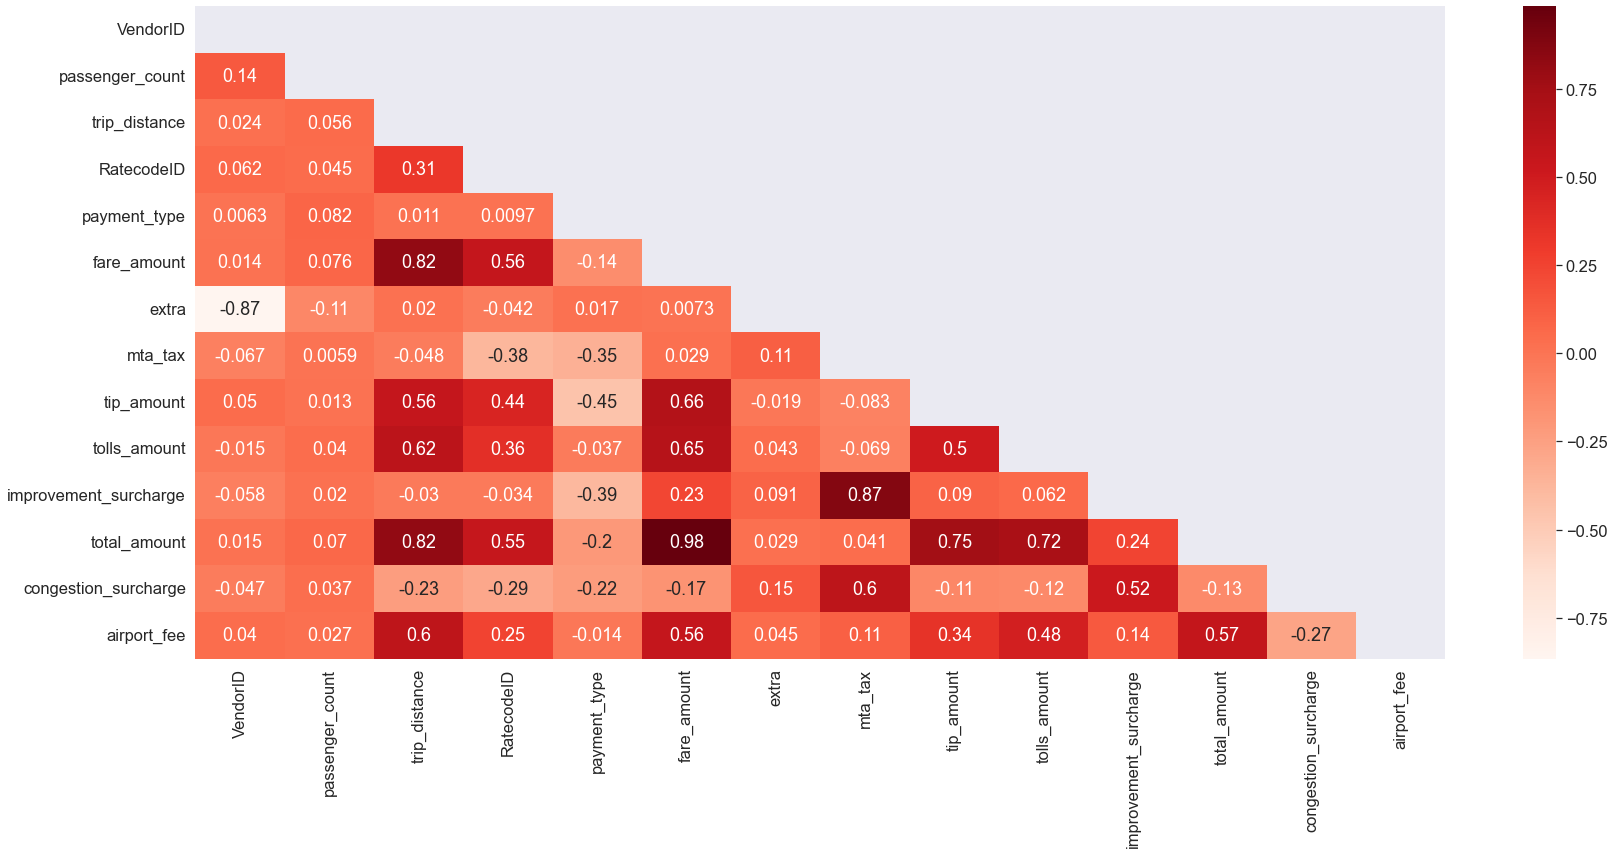

In [15]:
#correlation matrix [Multivariate graphical method]
corr = ready_df.corr()
plt.figure(figsize=(28,12))
#masking the upper triangle part (since matrix is repetitive)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Reds", annot=True)
plt.show()

from this matrix, we can conclude that:

    1. There're strong positive correlation between: fare_amount and total_amount, improvement_surcharge and mta_tax, trip_distance and fare_amount, trip_distance and total_amount, total_amount and trip_amount, total_amount and tolls_amount.
    
    The reason behind that relationship are simple. Farther distance affect to higher fare. Additional fare affect the increasement of total_amount/fare_amount.
    
    2. There're weak positive correlation between: fare_amount and improvement_surcharge, total_amount and improvement_surcharge, RatecodeID and airport_fee 
    
    (i'm still figuring it out why)

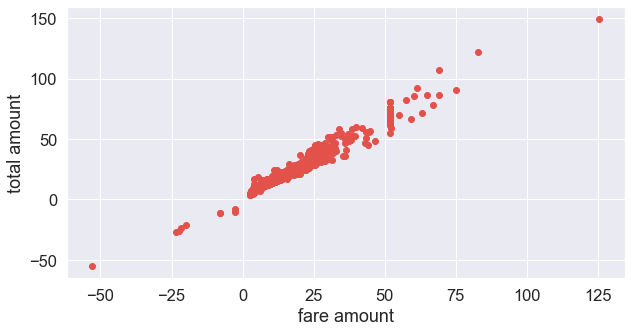

In [17]:
#draw scatter plot of 'total_amount', and 'fare_amount' [Bivariate graphical method]
# Scatter plot
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(y = ready_df['total_amount'],x =  ready_df['fare_amount'])
 
# x-axis label
ax.set_xlabel('fare amount')
 
# y-axis label
ax.set_ylabel('total amount')
plt.show()

From above scatter plot, it shows linear relationship between 'total_amount', and 'fare_amount'. As fare_amount increase, total_amount will increase too. This relationship has explained excellently in above correlation matrix.

## 3.1 Descriptive statistics 

This section will perform Univariate non-graphical EDA

### Q1: Calculate total passenger, revenue, fare amount, and tip amount in April 2022

In [7]:
totals = upd_df[["passenger_count", "total_amount", "fare_amount", "tip_amount"]].sum().to_frame().T
totals.rename(columns={'passenger_count': 'TotalPassenger',
                    'total_amount': 'TotalRevenue',
                    'fare_amount': 'TotalFare',
                    'tip_amount': 'TotalTips'}, inplace=True)
totals

,TotalPassenger,TotalRevenue,TotalFare,TotalTips
0,1431.0,20785.29,13950.83,2698.86


### Q2: Calculate average trip distance, duration, and speed in April 2022

In [9]:
avg = upd_df[['trip_distance', 'trip_duration', 'speed']].mean().to_frame().T
avg.rename(columns={'trip_distance': 'AverageDistance',
                'trip_duration': 'AverageDuration',
                'speed': 'AverageSpeed'}, inplace=True)
avg

,AverageDistance,AverageDuration,AverageSpeed
0,3.38685,15.582467,12.343066


### Q3: Calculate total additional fare in April 2022

In [10]:
#additional fare included: airport_fee, tolls_amount, congestion_surcharge, improvement_surcharge, extra, mta_tax
addt = upd_df[['airport_fee', 'tolls_amount', 'congestion_surcharge', 'improvement_surcharge', 'extra', 'mta_tax']].sum().to_frame().T
addt.rename(columns={'airport_fee': 'TotalAirportFee',
                    'tolls_amount': 'TollsAmount',
                    'congestion_surcharge': 'TotalCongestionSurcharge',
                    'improvement_surcharge': 'TotalImprovementSurcharge',
                    'extra': 'ExtraAmount',
                    'mta_tax': 'MTATaxAmount'}, inplace=True)
addt

,TotalAirportFee,TollsAmount,TotalCongestionSurcharge,TotalImprovementSurcharge,ExtraAmount,MTATaxAmount
0,86.25,576.75,2321.0,294.6,1016.5,487.0


## 3.2 Data Visualization

This section will perform Univariate graphical and Multivariate graphical EDA

### Q4: What's the most used payment method?

[Text(0, 0, 'Credit card'),
 Text(1, 0, 'Cash'),
 Text(2, 0, 'No charge'),
 Text(3, 0, 'Dispute'),
 Text(4, 0, 'Unknown')]

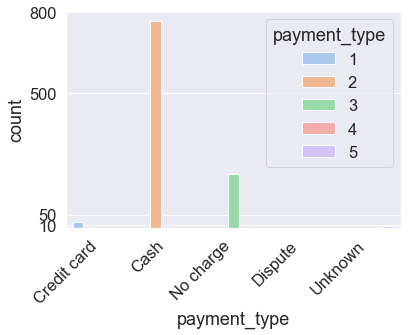

In [30]:
payment = sns.countplot(
        x="payment_type", 
        hue="payment_type",
        data=ready_df,
        palette=sns.set_palette("pastel")
                )

ticks = [10, 50, 500, 800]
payment.set_yticks(ticks)
payment.set_yticklabels(ticks)

payment.set(xticklabels=["Credit card", "Cash", "No charge", "Dispute", "Unknown"])
payment.set_xticklabels(payment.get_xticklabels(), rotation=45, horizontalalignment='right')

In [29]:
print("Count of payment_type using credit card is ",
      ready_df[ready_df['payment_type'] == 1]['payment_type'].count())
print("Count of payment_type using cash is ",
      ready_df[ready_df['payment_type'] == 2]['payment_type'].count())
print("Count of no charge payment_type is ",
      ready_df[ready_df['payment_type'] == 3]['payment_type'].count())
print("Count of dispute payment_type typed is ",
      ready_df[ready_df['payment_type'] == 4]['payment_type'].count())
print("Count of unknown payment_type is ",
      ready_df[ready_df['payment_type'] == 5]['payment_type'].count())
print("Count of voided trip payment_type card is ",
      ready_df[ready_df['payment_type'] == 6]['payment_type'].count())

Count of payment_type using credit card is  23
Count of payment_type using cash is  768
Count of no charge payment_type is  201
Count of dispute payment_type typed is  2
Count of unknown payment_type is  6
Count of voided trip payment_type card is  0


### Q5: How's the passenger satisfication rate?

[Text(0, 0, 'Standard rate'),
 Text(1, 0, 'JFK'),
 Text(2, 0, 'Newark'),
 Text(3, 0, 'Nassau or Westchester'),
 Text(4, 0, 'Negotiated')]

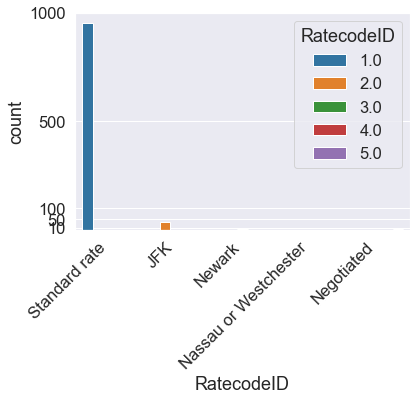

In [33]:
rating = sns.countplot(
        x="RatecodeID", 
        hue="RatecodeID",
        data=ready_df,
        palette=sns.set_palette("tab10")
)

ticks = [10, 50, 100, 500, 1000]
rating.set_yticks(ticks)
rating.set_yticklabels(ticks)

rating.set(xticklabels=["Standard rate", "JFK", "Newark", "Nassau or Westchester", "Negotiated"])
rating.set_xticklabels(rating.get_xticklabels(), rotation=45, horizontalalignment='right')

In [32]:
print("Count of standard rate is ",
      ready_df[ready_df['RatecodeID'] == 1]['RatecodeID'].count())
print("Count of JFK rate is ",
      ready_df[ready_df['RatecodeID'] == 2]['RatecodeID'].count())
print("Count of Newark rate is ",
      ready_df[ready_df['RatecodeID'] == 3]['RatecodeID'].count())
print("Count of Nassau or Westchester rate is ",
      ready_df[ready_df['RatecodeID'] == 4]['RatecodeID'].count())
print("Count of Negotited fare is ",
      ready_df[ready_df['RatecodeID'] == 5]['RatecodeID'].count())
print("Count of Group ride rate is ",
      ready_df[ready_df['RatecodeID'] == 6]['RatecodeID'].count())

Count of standard rate is  953
Count of JFK rate is  35
Count of Newark rate is  3
Count of Nassau or Westchester rate is  2
Count of Negotited fare is  7
Count of Group ride rate is  0


### Q6: What's the most used VendorID?

[Text(0, 0, 'Creative Mobile Tech., LLC'), Text(1, 0, 'VeriFone Inc.')]

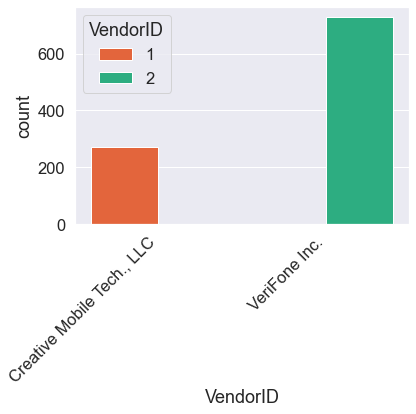

In [38]:
vendor = sns.countplot(
        x="VendorID", 
        hue="VendorID", 
        data=ready_df,
        palette=sns.color_palette(['#FF5720', '#18C288'])
                )

vendor.set(xticklabels=["Creative Mobile Tech., LLC", "VeriFone Inc."],)  
vendor.set_xticklabels(vendor.get_xticklabels(), rotation=45, horizontalalignment='right')

In [37]:
print("Count of total service using VeriFone Inc. is ",
      ready_df[ready_df['VendorID'] == 2]['VendorID'].count())
print("Count of total service using Creative Mobile Technologies, LLC is ",
      ready_df[ready_df['VendorID'] == 1]['VendorID'].count())

Count of total service using VeriFone Inc. is  728
Count of total service using Creative Mobile Technologies, LLC is  272


### Q7: Draw Line Chart of Daily Trip Count, Total Daily Revenue, Average Daily Distance, Passenger Count, Average Daily Duration, Average Daily Speed and Average Daily Fare	

In [12]:
viz1 = pd.read_csv('final_upd_daily_aggregation.csv')
viz1.head()

,tpep_pickup_datetime,DailyTripCount,TotalDailyRevenue,AverageDailyDistance,TotalDailyPassenger,AverageDailyDuration,AverageDailySpeed,AverageDailyFare,DailyTipAmount,DailyTollsAmount,TotalDailyAirportFee,TotalDailyExtra,TotalDailyMTATax,TotalDailyImprovementSurcharge,AverageDailyCongestionSurcharge
0,2022-04-01,29,605.93,3.564138,37.0,15.106897,11.938117,14.034483,67.08,19.65,5.00,47.75,14.5,8.7,2.327586
1,2022-04-02,30,720.69,3.822000,48.0,40.949444,13.261376,17.496667,87.04,16.10,1.25,13.00,13.0,8.4,2.066667
2,2022-04-03,28,559.01,4.658929,36.0,16.866667,14.423538,13.571429,70.81,19.65,1.25,17.75,13.0,7.8,2.214286
3,2022-04-04,43,918.34,2.856047,63.0,13.084496,12.302708,13.918605,125.29,38.40,1.25,48.50,21.0,12.9,2.383721
4,2022-04-05,34,511.03,1.877353,52.0,10.249510,10.669063,9.102941,73.83,0.00,0.00,38.00,17.0,10.2,2.485294


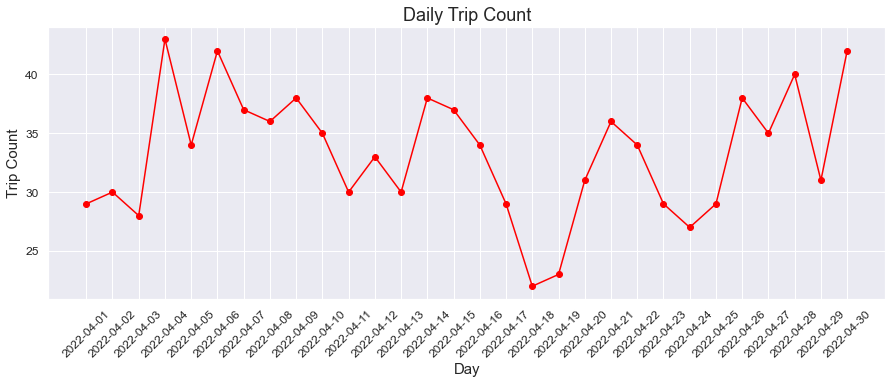

In [44]:
#Daily trip count
plt.figure(figsize = (15,5))
plt.plot(viz1['tpep_pickup_datetime'], viz1['DailyTripCount'], color='red', marker='o')
plt.title('Daily Trip Count', fontsize=18)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Trip Count', fontsize=15)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

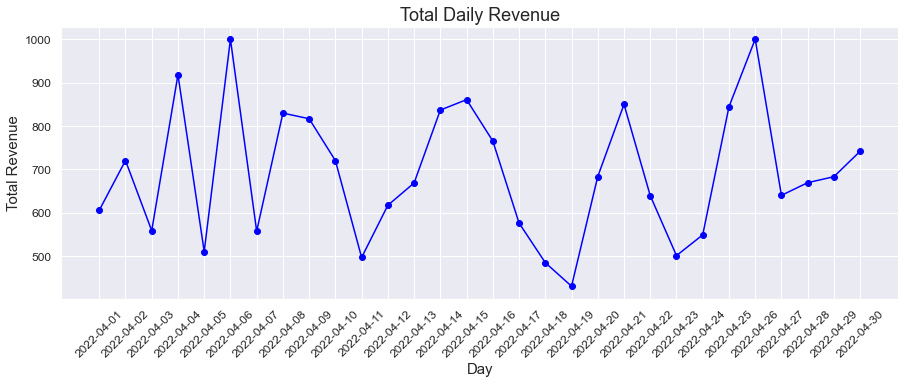

In [45]:
#total daily distance
plt.figure(figsize = (15,5))
plt.plot(viz1['tpep_pickup_datetime'], viz1['TotalDailyRevenue'], color='blue', marker='o')
plt.title('Total Daily Revenue', fontsize = 18)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Total Revenue', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

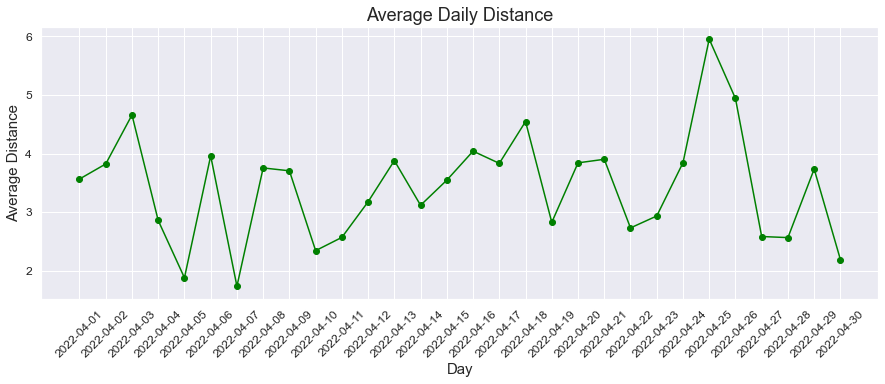

In [46]:
#average daily distance
plt.figure(figsize = (15,5))
plt.plot(viz1['tpep_pickup_datetime'], viz1['AverageDailyDistance'], color='green', marker='o')
plt.title('Average Daily Distance', fontsize = 18)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Average Distance', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

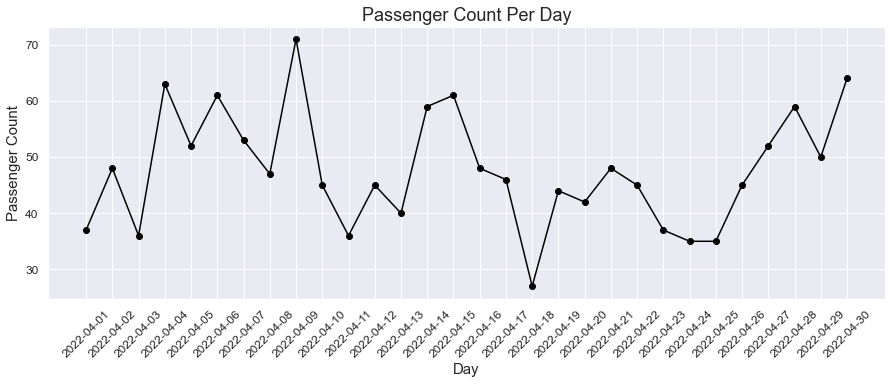

In [47]:
#passenger count
plt.figure(figsize = (15,5))
plt.plot(viz1['tpep_pickup_datetime'], viz1['TotalDailyPassenger'], color='black', marker='o')
plt.title('Passenger Count Per Day', fontsize = 18)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Passenger Count', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

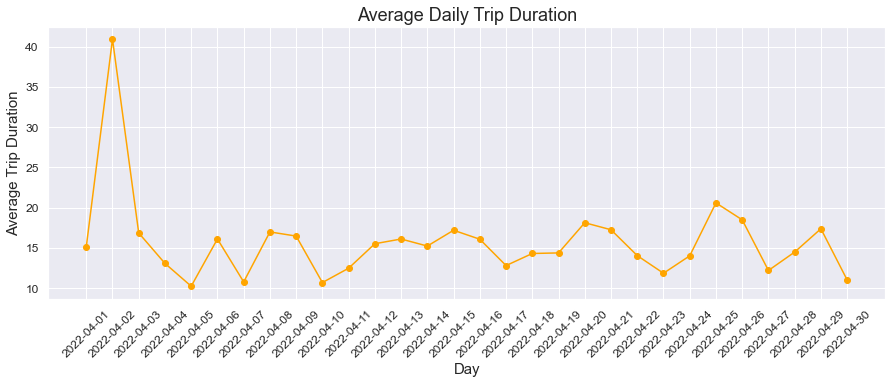

In [49]:
#Average Daily Duration
plt.figure(figsize = (15,5))
plt.plot(viz1['tpep_pickup_datetime'], viz1['AverageDailyDuration'], color='orange', marker='o')
plt.title('Average Daily Trip Duration', fontsize = 18)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Average Trip Duration', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

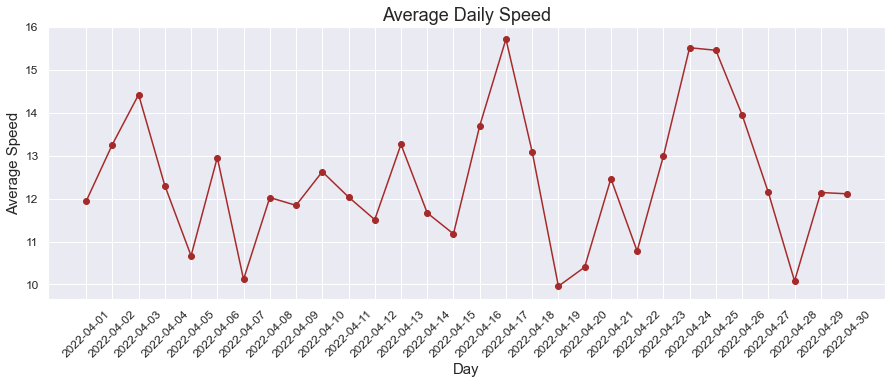

In [51]:
#Average Daily Speed
plt.figure(figsize = (15,5))
plt.plot(viz1['tpep_pickup_datetime'], viz1['AverageDailySpeed'], color='brown', marker='o')
plt.title('Average Daily Speed', fontsize = 18)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Average Speed', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

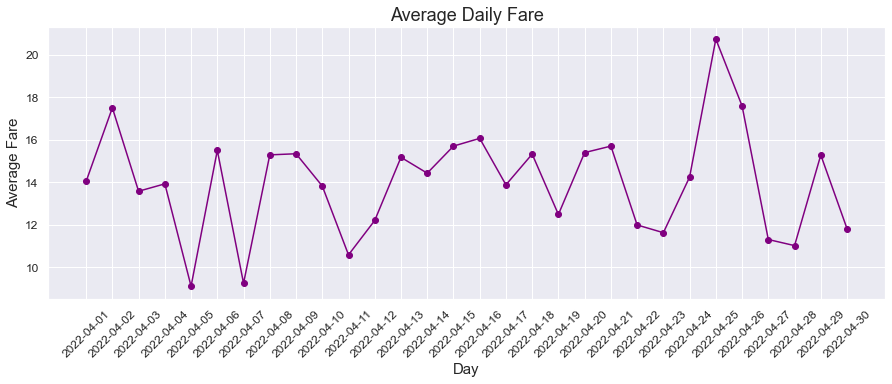

In [52]:
#Average Daily Fare
plt.figure(figsize = (15,5))
plt.plot(viz1['tpep_pickup_datetime'], viz1['AverageDailyFare'], color='purple', marker='o')
plt.title('Average Daily Fare', fontsize = 18)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Average Fare', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.grid(True)
plt.show()

In [19]:
viz2 = pd.read_csv('final_upd_weekly_aggregation.csv')
viz2.tail()

,tpep_pickup_datetime,WeeklyTripCount,TotalWeeklyRevenue,AverageWeeklyDistance,TotalWeeklyPassenger,AverageWeeklyTripDuration,AverageWeeklySpeed,AverageWeeklyFare,WeeklyTipAmount,WeeklyTollsAmount,TotalWeeklyAirportFee,TotalWeeklyExtra,TotalWeeklyMTATax,TotalWeeklyImprovementSurcharge,AverageWeeklyCongestionSurcharge
0,2022-04-03,87,1885.63,4.005402,121.0,24.584483,13.194319,15.079310,224.93,55.40,7.50,78.50,40.5,24.9,2.201149
1,2022-04-10,265,5354.57,2.924264,392.0,13.583522,11.831477,13.272264,727.72,154.95,18.75,252.25,130.5,79.5,2.383019
2,2022-04-17,231,4823.89,3.447229,335.0,15.170924,12.628772,14.077446,621.50,137.55,20.00,236.00,112.5,67.5,2.333333
3,2022-04-24,202,4140.91,3.495495,278.0,14.999835,12.131124,13.836584,523.22,104.80,12.50,204.50,99.0,59.4,2.316832
4,2022-05-01,215,4580.29,3.539767,305.0,15.393178,12.521326,14.301860,601.49,124.05,27.50,245.25,104.5,63.3,2.283721


### Q8: Draw stacked bar chart of Weekly Trip Count, and Passenger Count (y-scale in hundreds)

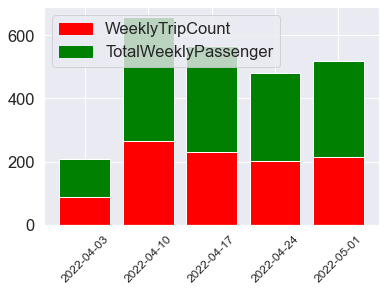

In [20]:
colors = {'WeeklyTripCount':'red', 'TotalWeeklyPassenger':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

#stacked bar to visualize: Weekly Trip Count, and Passenger Count
x = viz2['tpep_pickup_datetime']
y1 = viz2['WeeklyTripCount']
y2 = viz2['TotalWeeklyPassenger']
plt.bar(x, y1, color='red')
plt.bar(x, y2, bottom=y1, color='green')
plt.xticks(fontsize = 12, rotation = 45)
plt.legend(handles, labels)
plt.show()

### Q9: Draw grouped Bar Chart of Average Weekly Distance, Average Weekly Trip Duration, and Average Weekly Speed (y-scale in hundreds)

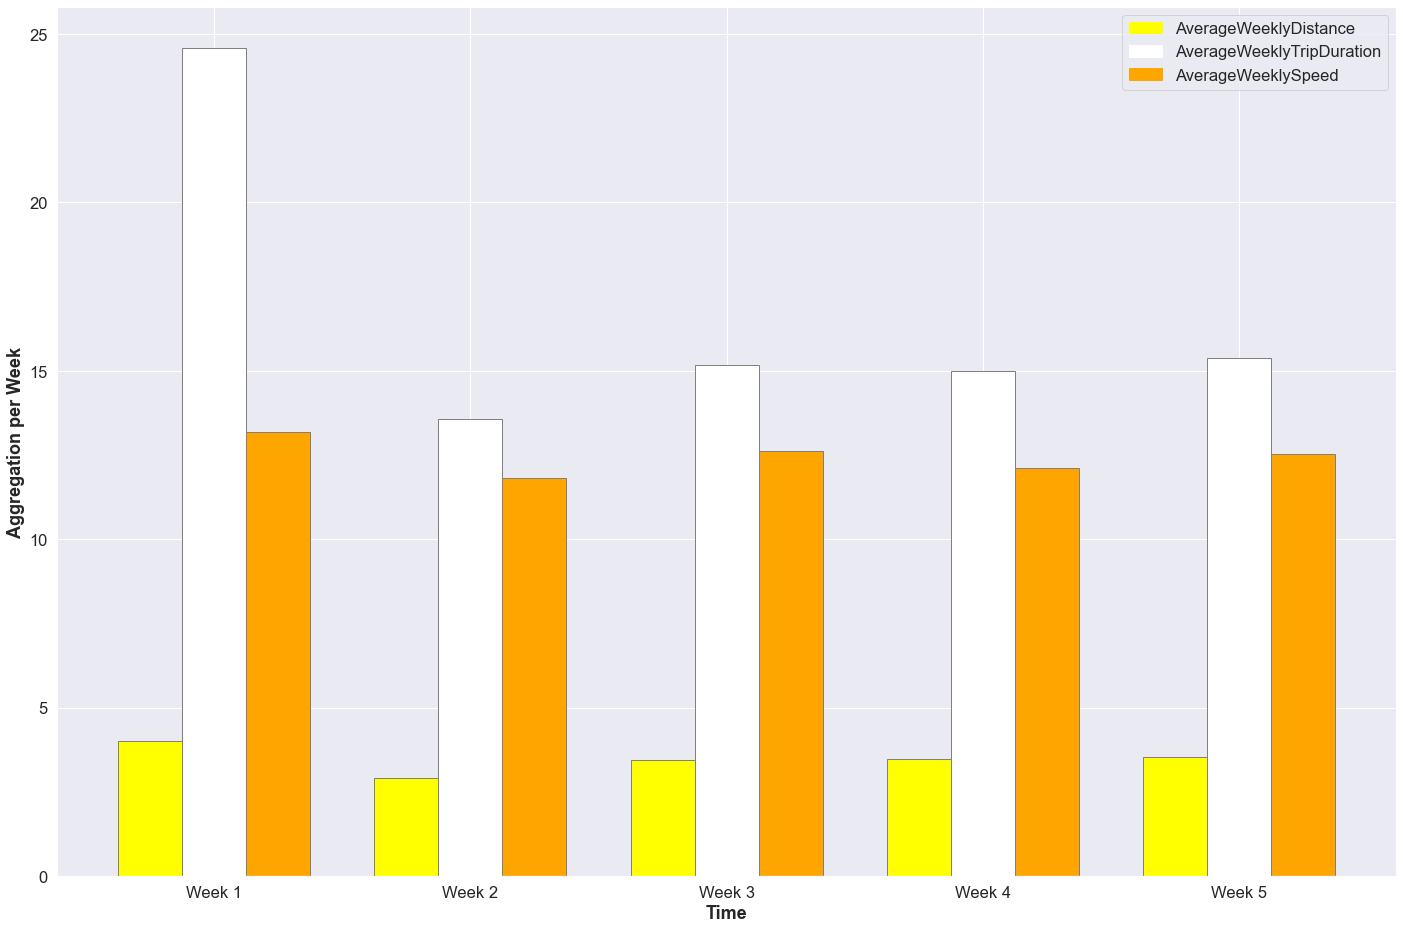

In [72]:
#set up legends
colors = {'AverageWeeklyDistance': 'yellow',
         'AverageWeeklyTripDuration': 'white',
         'AverageWeeklySpeed': 'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(24, 16))

# set height of bar
AvgDistance = viz2['AverageWeeklyDistance']
AvgTripDuration = viz2['AverageWeeklyTripDuration']
AvgSpeed = viz2['AverageWeeklySpeed']

# Set position of bar on X axis
br1 = np.arange(len(TripCount))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, AvgDistance, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='AvgDistance')
plt.bar(br2, AvgTripDuration, color ='white', width = barWidth,
        edgecolor ='grey', label ='AvgTripDuration')
plt.bar(br3, AvgSpeed, color ='orange', width = barWidth,
        edgecolor ='grey', label ='AvgSpeed')

# Adding Xticks
plt.xlabel('Time', fontweight ='bold', fontsize = 18)
plt.ylabel('Aggregation per Week', fontweight ='bold', fontsize = 18)
plt.xticks([r + barWidth for r in range(len(AvgDistance))],
        ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5'])
 
plt.legend(handles, labels)
plt.show()

### Q10: Which week in April 2022 has the highest revenue?

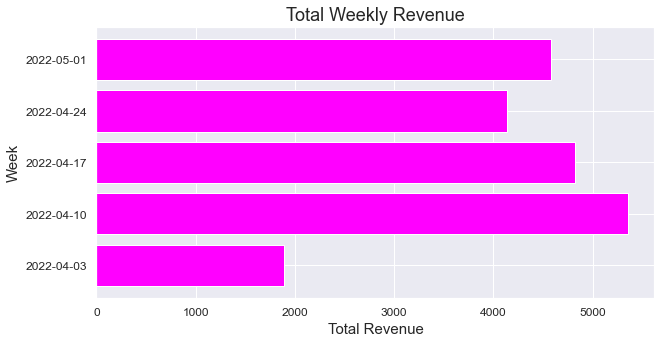

In [93]:
plt.figure(figsize = (10,5))
plt.barh(viz2['tpep_pickup_datetime'], viz2['TotalWeeklyRevenue'], color='magenta')
plt.title('Total Weekly Revenue', fontsize = 18)
plt.xlabel('Total Revenue', fontsize = 15)
plt.ylabel('Week', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# Conclusion

**From Question 1-3**

Descriptive Statistics is used to calculate average and total of particular variable. By using this method,
we expected to get better understanding of certain issue.

From above calculation, we can summarize some points:

    1. Total passenger in April 2022 is 1431 person, with total revenue $20785.29 that hasn't substraced with tax and another additional cost.

    2. Average distance in April 2022 is 3.386 miles, with average trip duration of 15.582 minutes and 12.343 miles/second

    3. In April 2022, the highest additional fare comes from congestion surcharge with total $2321,
and the lowest one is airport fee which is only $86.25

**From Question 5-6**

Drawing countplot is useful to display observational counts in different category using bars, from above countplot we can conclude that:

    1. Cash is the most used payment type, with total 768 passenger using it, then it followed by no charged with total of 201 passenger.

    2. 953 from 1000 passengers give standard rate.

    3. VeriFone Inc. is the most used Vendor ID.

**From Question 7**

Line chart used to show information that change over time. Considering all of the line charts above, we can deduce that:
    
    1. On 4 April 2022, it shows highest trip count with total 44 trips. The lowest one occurs on 18 April 2022 with total 22 trips
    
    2. 'Daily Trip Count' correlated with 'Total Daily Revenue'. The more trips occurs in certain day, the more revenue we gain
    
    3. Overall, 'Average Daily Distance', 'Passenger Count', 'Average Daily Speed' and 'Average Daily Fare' show ups and downs trend
    
    4. Average Daily Duration show different trend. The first 3 days show drastic up and down duration change, while the rest 27 days show usual up and down pattern with duration between 10-21 minutes


**From Question 8-10**

Stacked or grouped bar chart is useful to grouping some variables in similar categories or scale. From above Stacked and grouped bar chart, we can conclude that:

    1. Highest weekly trip duration occurs in the first week of April 2022. Average weekly speed range between 0-14 miles/second while the average weekly distance spread between 0-5 miles.

    2. Week 2 of April 2022 has the highest revenue

# Future Work

    1. Despite the fact that we're not solving any business problems, now we're able to extract meaningful value from raw data set. In the future, with the help of business knowledge we can better understand the relationship between variables. We can also determine which variables that should be / shouldn't be included in analysis.

    2. Instead of asking impactful questions, i choose to ask questions to fulfill my curiosity. In the course of time, it's better to read more references about how to ask good business questions regarding this case.

    3. My codes weren't written effectively. Some of them are repetitive, so i need to utilize it.

    4. Because of the data set limitless, we're not able to create powerful report/dashboard to help stakeholders make decision. Next time, it would be better if we obtained more comprehensive data set (not only in one month). By doing this, we can create a model to check which variables contribute to profit also predict certain numerical aspect like revenue, total passenger, expenditure, and so on.

**Thanks for your attention, i'm looking forward to your feedback**